## Observations and Insights 

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress 


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [17]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df= pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [19]:
# Checking the number of mice in the clean DataFrame.
mouse_count=combined_df["Mouse ID"].count()
mouse_count


1893

In [21]:
duplicate_rows=combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
clean_df=combined_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dv = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem= combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_data = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drugs_df= drug_data[["Drug Regimen", "Mouse ID"]]
drugs_df= drugs_df.set_index("Drug Regimen")

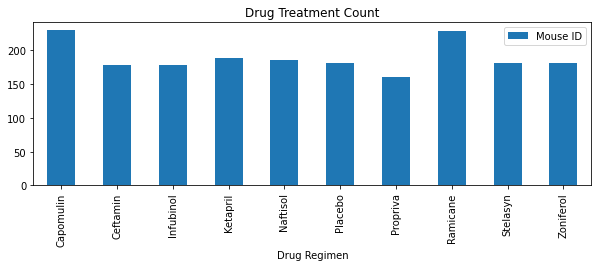

<Figure size 432x288 with 0 Axes>

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

drugs_df.plot(kind="bar", figsize=(10,3))

plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

drug_list = summary_df.index.tolist()
drug_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [44]:
drug_count = (combined_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Count')

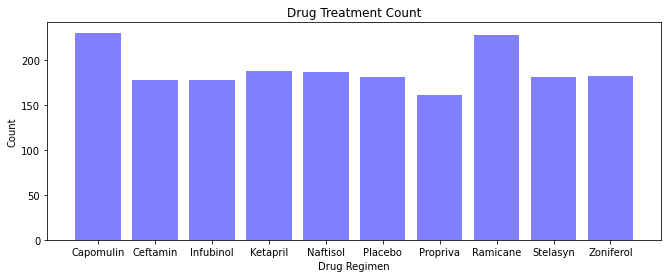

In [45]:
x_axis = np.arange(len(drug_count))
x_axis = drug_list

plt.figure(figsize=(11,4))
plt.bar(x_axis, drug_count, color= 'b', alpha=0.5, align="center")
plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

In [46]:
plt.clf()
plt.cla()
plt.close()

gender_df=pd.DataFrame(combined_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [47]:
gender_df=gender_df[["Sex", "Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

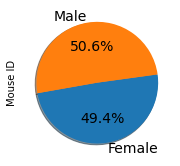

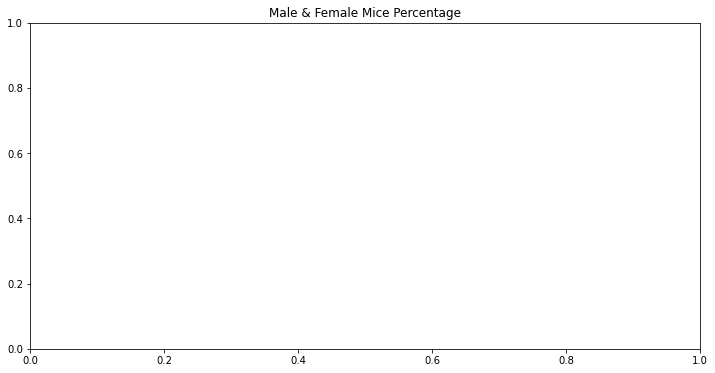

In [54]:
ax1= plt.subplot(121, aspect="equal")
plt.figure(figsize=(12,6))
gender_df.plot(kind="pie", y="Mouse ID", ax=ax1, autopct='%1.1f%%', startangle=190, shadow=True, labels=gender_df["Sex"], legend= False, fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

In [55]:
plt.clf()
plt.cla()
plt.close()

gender_count= (combined_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[935, 958]

(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

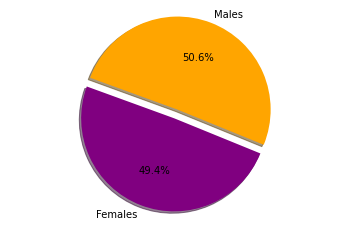

In [56]:
labels=["Females", "Males"]
colors=["purple", "orange"]
explode= (0.1, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

In [ ]:
plt.clf()
plt.cla()
plt.close()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [58]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

sorted_df=combined_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
last_df=sorted_df.loc[sorted_df["Timepoint"] ==45]
last_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [60]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capo_df=last_df[last_df["Drug Regimen"].isin(["Capomulin"])]
capo_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [61]:
capo_obj=capo_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capo_obj= capo_obj["Tumor Volume (mm3)"]
capo_obj

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [64]:
quartiles= capo_obj.quantile([.25,.5,.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr= upperq - lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile of temperatures is: {iqr}")
print(f"The median of temperatures is: {quartiles[0.5]}")

upper_bound= upperq + (1.5*iqr)
lower_bound= lowerq - (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile of temperatures is: 7.781863460000004
The median of temperatures is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


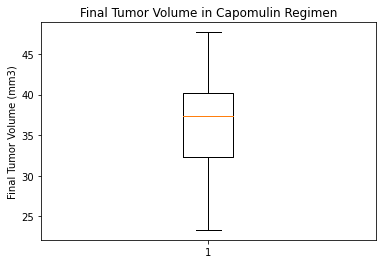

In [65]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Capomulin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(capo_obj)
plt.show()

In [66]:
ram_df=last_df[last_df["Drug Regimen"].isin(["Ramicane"])]
ram_df.head().reset_index

<bound method DataFrame.reset_index of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
327     a411     Ramicane    Male           3          22         45   
430     a444     Ramicane  Female          10          25         45   
214     a520     Ramicane    Male          13          21         45   
174     a644     Ramicane  Female           7          17         45   
154     c758     Ramicane    Male           9          17         45   

     Tumor Volume (mm3)  Metastatic Sites  
327           38.407618                 1  
430           43.047543                 0  
214           38.810366                 1  
174           32.978522                 1  
154           33.397653                 1  >

In [67]:
ram_obj= ram_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_obj=ram_obj["Tumor Volume (mm3)"]
ram_obj

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

## Line and Scatter Plots

In [69]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [119]:
capo_mouse=capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capo_mouse


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


<AxesSubplot:xlabel='Timepoint'>

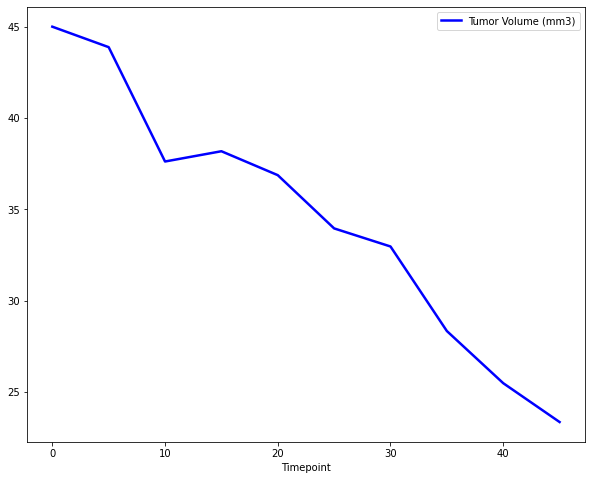

In [120]:
capo_mouse= capo_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capo_mouse= capo_mouse.reset_index(drop=True)
capo_mouse.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color="blue")

In [121]:
weight_df=capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [122]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_capo= pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capo.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [123]:
avg_capo=avg_capo.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_capo.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


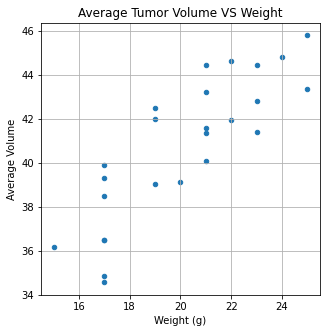

In [124]:
avg_capo.plot(kind="scatter", x= "Weight (g)", y= "Average Volume", grid=True, figsize=(5,5), title="Average Tumor Volume VS Weight")
plt.show()

In [125]:
plt.clf()
plt.cla()
plt.close()

## Correlation and Regression

In [134]:
correlation=st.pearsonr(x, y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.8419363424694718
The equation of the regression line is: y=0.95x+21.55


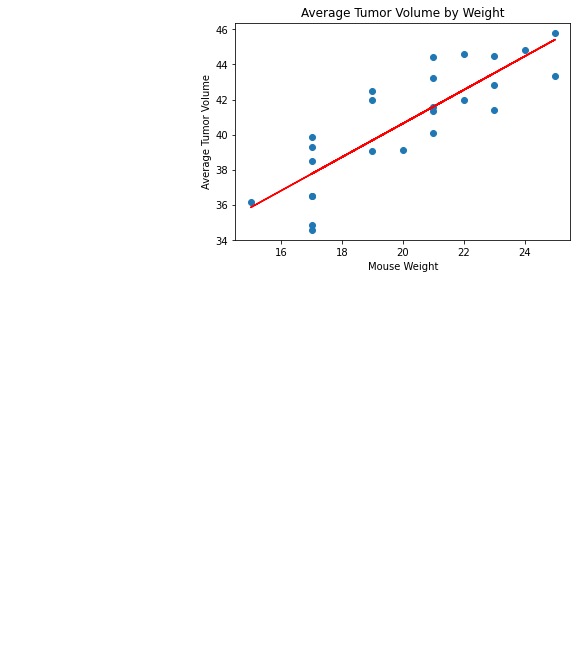

In [138]:
x = avg_capo["Weight (g)"]
y = avg_capo["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x*slope+intercept
line_eq = "y=" + str(round(slope,2))+ "x+" + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(7,11),fontsize=15,color="blue")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title('Average Tumor Volume by Weight')

print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

plt.show()